In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Style

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x+i*.5)*(7-i)*flip)

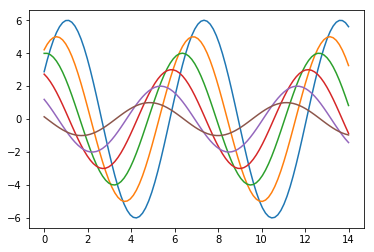

In [3]:
sinplot()

> 引入了seaborn之后，再进行画图的话，就会直接引入seaborn设定的样式。

In [3]:
import seaborn as sns

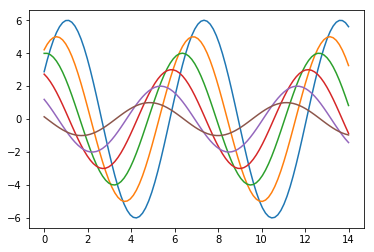

In [5]:
sinplot()

> 在**seaborn** 缺省的条件下，有五种样式，分别如下所示：
* ＋ darkgrid
* ＋ whitegrid
* ＋ dark
* ＋ white
* ＋ ticks

同时，我们还可以使用下面的方式使用样式：
`set_style(), axes_style()`

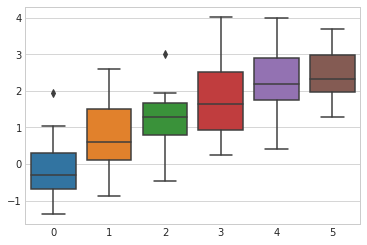

In [8]:
sns.set_style('whitegrid')
data = np.random.normal(size=(20, 6)) + np.arange(6)/2
sns.boxplot(data=data)

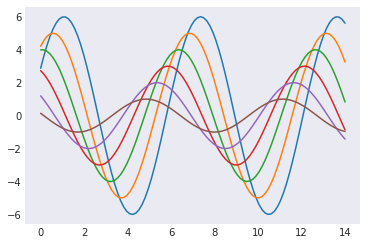

In [9]:
sns.set_style('dark')
sinplot()

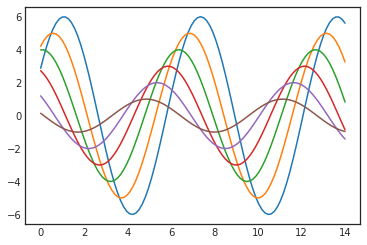

In [10]:
sns.set_style('white')
sinplot()

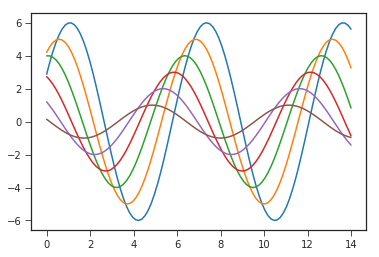

In [11]:
sns.set_style('ticks')
sinplot()

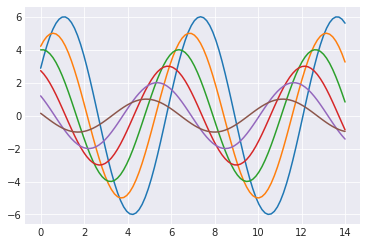

In [12]:
sns.set_style('darkgrid')
sinplot()

## spine
> 在上面我们画图的时候，实际上右边和上面的线我们是不需要的，这个东西在`seaborn`里面实际上是叫做 **`spine`** ，我们可以使用 **`despine`** 方法，把对应的边设置成True就可以了。

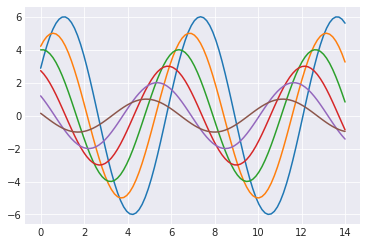

In [13]:
sinplot()
sns.despine()

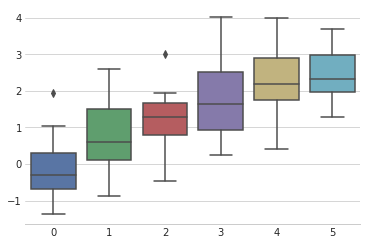

In [14]:
sns.set_style('whitegrid')
sns.boxplot(data=data, palette='deep')
sns.despine(left=True)

> 如果只是想在某个上下文中使用这个设置的话，可以按下面的方法进行(**主要是通过Python提供的`with`语句进行的！**)：

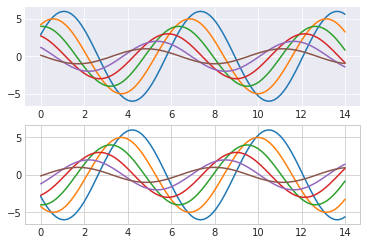

In [15]:
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

In [16]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

> 在使用的时候，我们可以在样式的后面加个字典来进行样式的自定义。

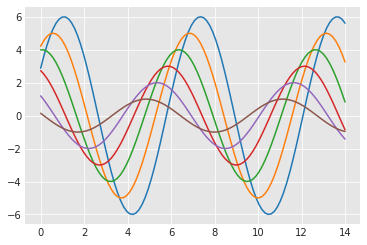

In [17]:
sns.set_style('darkgrid', {'axes.facecolor':'.9'})
sinplot()

## tips(一个案例，seaborn自带的一个数据集)

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## scatterplot

In [20]:
# regplot是回归的意思。
sns.regplot?

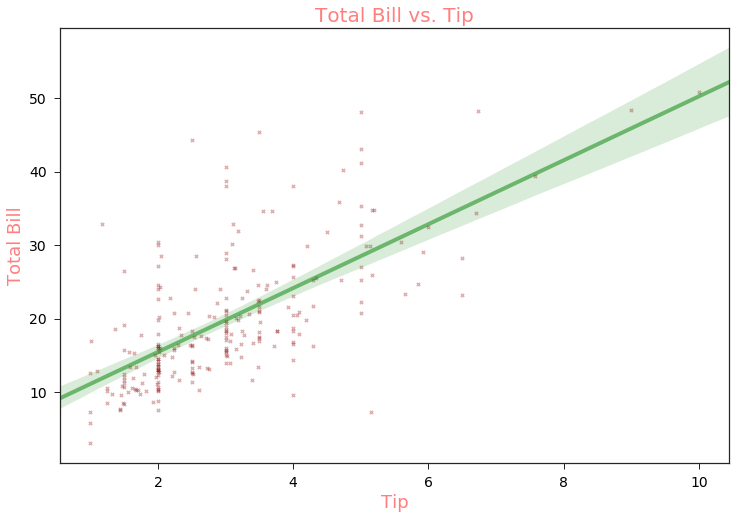

In [5]:
sns.set(style='ticks')

# regplot 同时画散点和回归曲线，里面的参数x就是值x坐标，y就是y坐标，data是指我们要是要使用的数据集。
# 参数ci是指我们常说的置信区间。scatter_kws是对散点的属性进行配置(其中s是表示大小)；
# line_kws是对线的属性进行配置(其中的lw是表示线的粗细。); marker是设定点的样子。

g = sns.regplot(x='tip', y='total_bill', data=tips, ci= 95,
               scatter_kws={'color':'darkred', 'alpha':0.3, 's':10},
               line_kws={'color':'g', 'alpha':0.5, 'lw':4}, marker='x')

# 去掉右边以及上部的spine
# sns.despine()

# 下面是在设置这个图的尺寸大小
g.figure.set_size_inches(12, 8)
g.axes.set_title('Total Bill vs. Tip', fontsize=20, color='r', alpha=0.5)
g.set_xlabel('Tip', size=18, color='r', alpha=0.5)
g.set_ylabel('Total Bill', size=18, color='r', alpha=0.5)
g.tick_params(labelsize=14, labelcolor='black')

## lmplot
> * **注意:** 在使用lamplot的时候，有很多的设置后面是跟着｀s｀的（ **以复数的形式出现**）
> * 这个plot有个参数非常关键，也就是 **`col`** 这个参数，这个参数决定了要画多少个图
> * **`palette`** 这个参数是调色板。
> * **`col_wrap`** 表示每列画多少行。
> * **`hue`** 也是表示颜色，
> * **`x_jitter`** 和 **`y_jitter`** 实际上是表示在这些点重叠的时候，添加抖动。
> * **`size`** 这个时候是表示我们的图的大小。

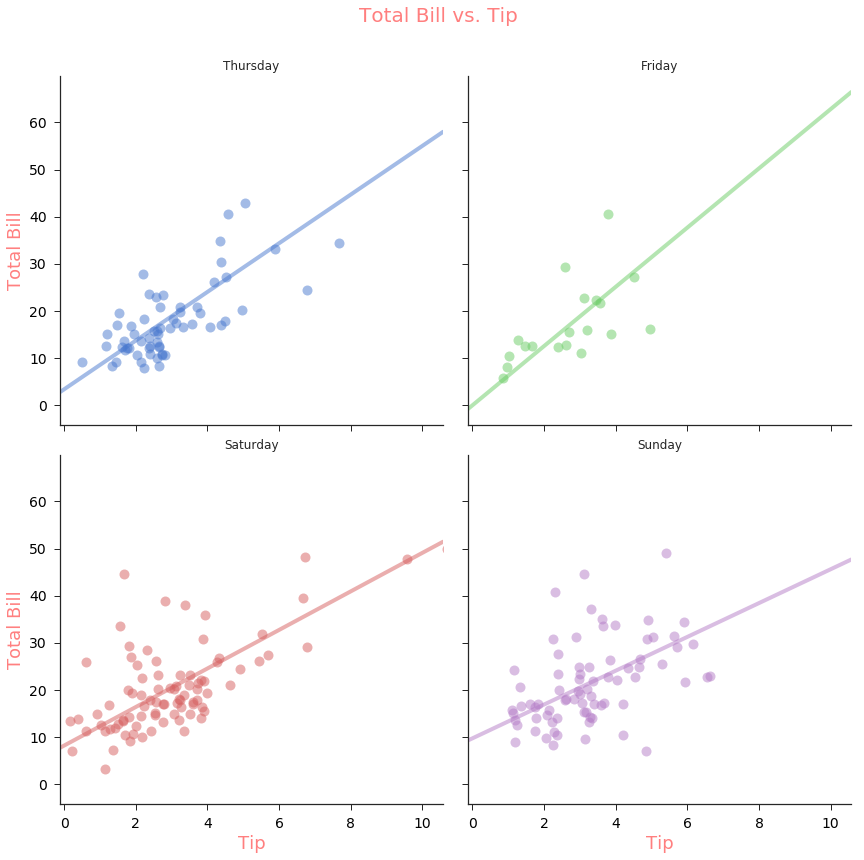

In [8]:
# lmplot for faceted plot(分片或者分面)

# col: 按天分别绘图
# palette: deep, muted, pastel, bright, dark, colorbind.
# col_wrap:每行两个图
# scatter_kws: points的属性
# hue: 每列数据对应的颜色
# size: graph size
g = sns.lmplot(x='tip', y='total_bill', ci=None, data=tips, col='day',
              palette='muted', col_wrap=2, scatter_kws={'s':100, 'alpha': .5},
              line_kws={'lw':4, 'alpha':0.5}, hue='day', x_jitter=1.0, y_jitter=1.0,size=6)

sns.despine()

# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Title
g.fig.suptitle('Total Bill vs. Tip', fontsize=20, color='r', alpha=0.5)

# Set the xlabel
g.set_xlabels('Tip', size=18, color='r', alpha=0.5)

# ylabel
g.set_ylabels('Total Bill', size=18, color='r', alpha=0.5)

# ticklabel size and color
titles = ['Thursday', 'Friday', 'Saturday', 'Sunday']
for ax,title in zip(g.axes.flat, titles):
    ax.tick_params(labelsize=14, labelcolor='black')
    ax.set_title(title)

In [9]:
g.axes.flat?

## barplots

In [10]:
sns.barplot?

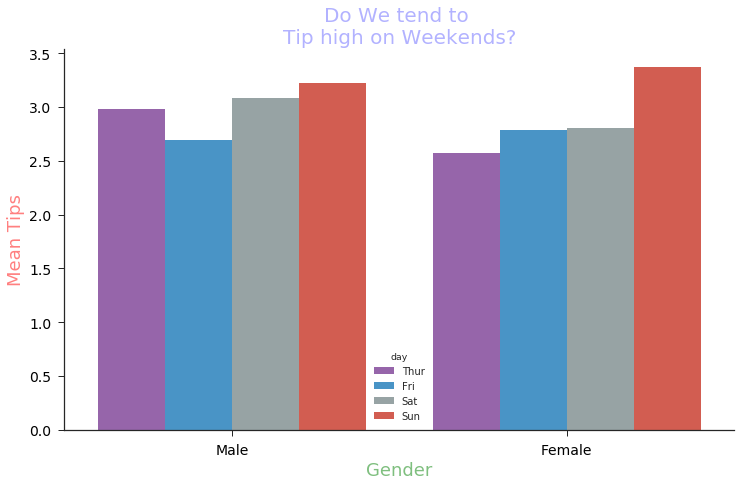

In [18]:
sns.set(style='ticks')

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# custom palette
g = sns.barplot(x='sex', y='tip', hue='day',
                palette=sns.color_palette(flatui), data=tips, ci=None)

sns.despine()
g.figure.set_size_inches(12, 7)

g.axes.set_title('Do We tend to \nTip high on Weekends?',
                 fontsize=20, color='b', alpha=0.3)

g.set_xlabel('Gender', size=18, color='g', alpha=0.5)

g.set_ylabel('Mean Tips', size=18, color='r', alpha=0.5)

g.tick_params(labelsize=14, labelcolor='black')

## 直方图／分布图（distplot）

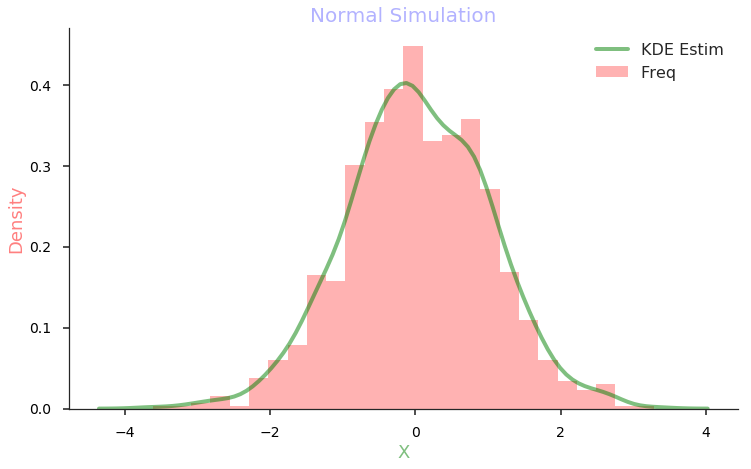

In [21]:
# distplot组合了matplotlib的hist()和kdplot()
# Create a list of 1000 Normal KVs
x = np.random.normal(size=1000)

sns.set_context('poster')
sns.set_style('ticks')

# 缺省直方图，kde＝False， norm_hist=False

g = sns.distplot(x,
                kde_kws={'color':'g', 'lw':4, 'label':'KDE Estim', 'alpha':0.5},
                hist_kws={'color':'r', 'alpha':0.3, 'label':'Freq'})

sns.despine()

g.figure.set_size_inches(12,7)
g.axes.set_title('Normal Simulation', fontsize=20, color='b', alpha=0.3)
g.set_xlabel('X', size=18, color='g', alpha=0.5)
g.set_ylabel('Density', size=18, color='r', alpha=0.5)
g.tick_params(labelsize=14, labelcolor='black')

## Iris

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


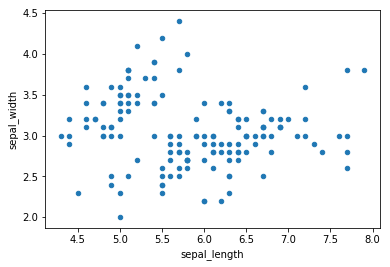

In [7]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

> 在使用 **`seaborn`** 的 **`jointplot`** 有个很好的用处： **除了把我们想要的散点图画了出来以外，还把每个变量的分布图一并画了出来！**

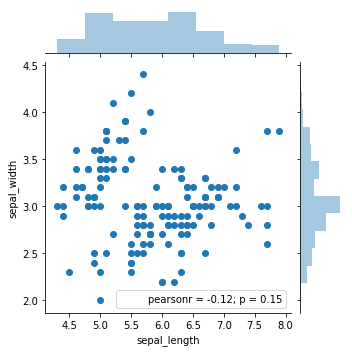

In [8]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

In [10]:
sns.FacetGrid?

> `seaborn` 的 **`FacetGrid`** 实际上是基于条件来画图。

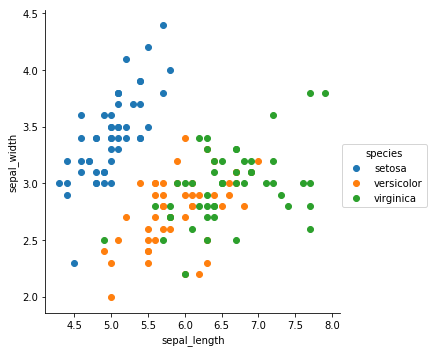

In [9]:
sns.FacetGrid(iris, hue="species", size=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

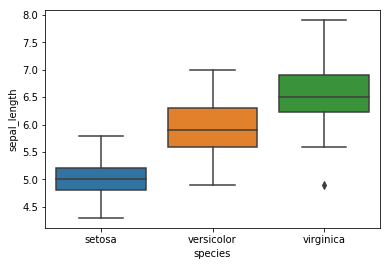

In [12]:
sns.boxplot(x='species', y='sepal_length', data=iris)

> 可以通过 `seaborn` 中的 **`stripplot`** 来进行点的叠加

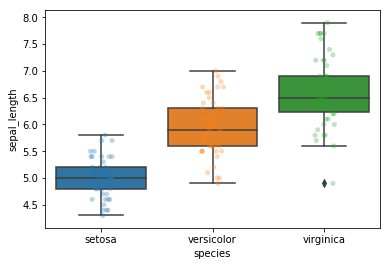

In [14]:
# 也可以把分布的点也叠加上去
ax = sns.boxplot(x='species', y='sepal_length', data=iris)
ax = sns.stripplot(x='species', y='sepal_length', data=iris, jitter=True, edgecolor='gray', alpha=0.3)

> `seaborn` 的 **`violinplot`** 也可以进行叠加。

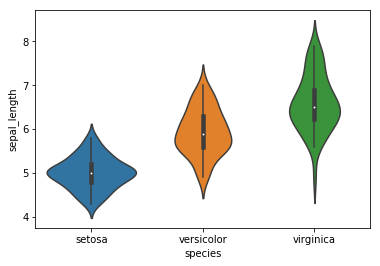

In [15]:
sns.violinplot(x='species', y='sepal_length', data=iris, size=6)

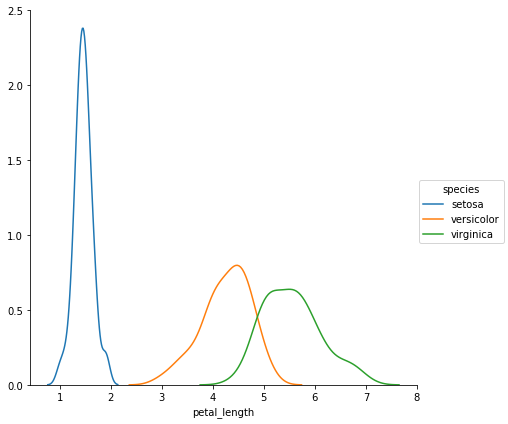

In [16]:
sns.FacetGrid(iris, hue='species', size=6).map(sns.kdeplot, 'petal_length').add_legend()

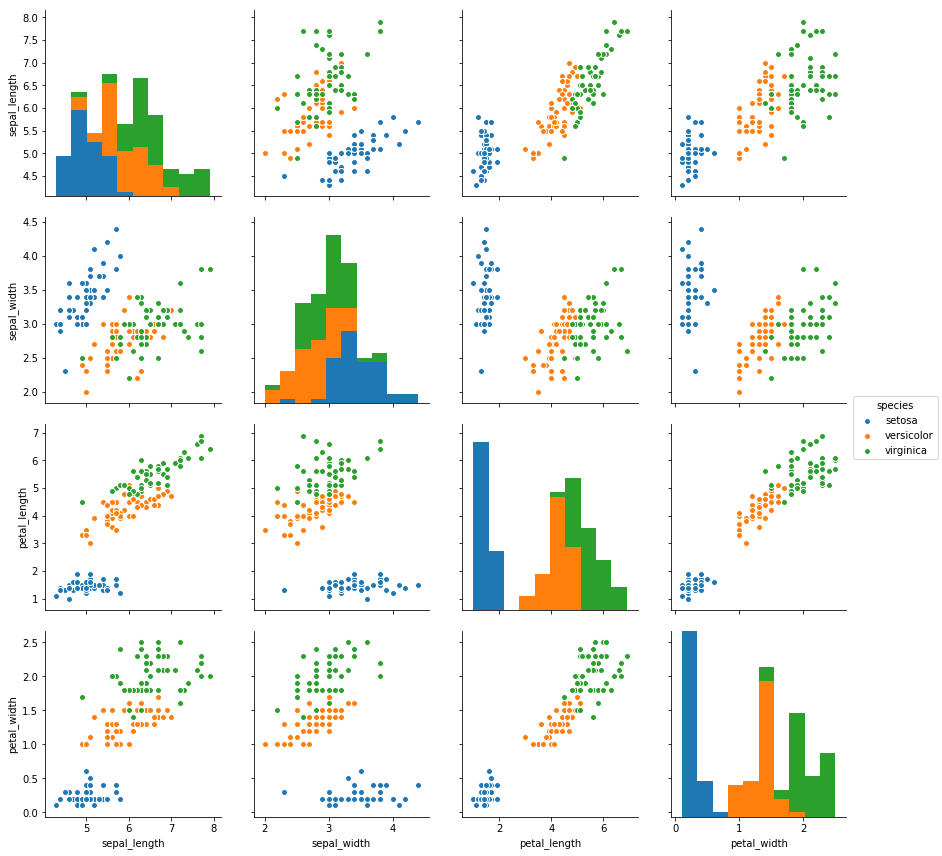

In [17]:
sns.pairplot(iris, hue='species', size=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1195cf470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1195da8d0>]], dtype=object)

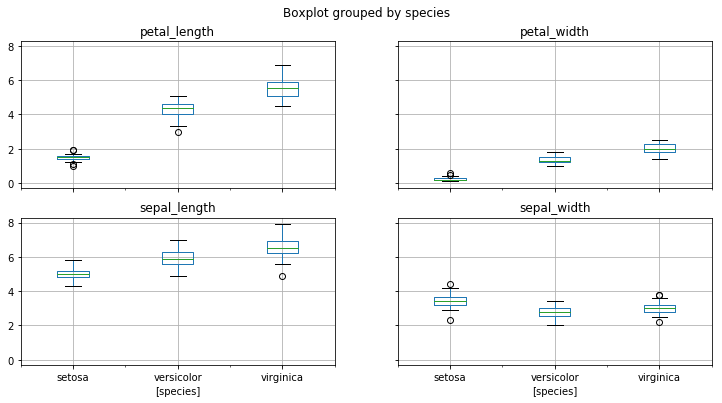

In [18]:
iris.boxplot(by='species', figsize=(12, 6))